# Working with data 2017. Class 2 
## Contact
Javier Garcia-Bernardo
garcia@uva.nl


## 0. Structure
1. Data types, structures and code II
2. Tidy data: Pivoting and melting dataframes
3. Merging and concatenating dataframes
4. Working with missing data
5. My second plots

In [8]:
from IPython.display import Image, display
import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline


#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

## 2. Tidy data
### 2.1 Observations and variables
- A variable is any characteristics, number, or quantity that can be measured or counted: e.g. income, height, happiness
    - Numeric: Numbers
        - Continuous: Area, height, etc
        - Discrete: The rolls of a die, many answers in surveys, etc
        
    - Categorical: Categories
        - Ordinal: Can be ordered. E.g. "high", "middle" and "low" income countries
        - Nominal: Cannot be ordered. E.g. "blue", "red" and "yellow" 
        
- An observation is each of the values of a variable: e.g. 800, 1.93, 8, "middle"

In [2]:
Image(url="http://www.abs.gov.au/websitedbs/a3121120.nsf/4a256353001af3ed4b2562bb00121564/5869990518bbb7feca257b55002261e0/Body/3.109A!OpenElement&FieldElemFormat=gif")

### 2.2 What is tidy data?
Based on: http://vita.had.co.nz/papers/tidy-data.pdf

Tidy data is a standard way of mapping the meaning of a dataset to its structure.  A dataset is
messy or tidy depending on how rows, columns and tables are matched up with observations,variables and types.  In
tidy data:
1.  Each variable forms a column.
2.  Each observation forms a row.
3.  Each type of observational unit forms a table.

#### Advantages: Facilitate manipulation, visualisation and modelling
- Combining tables (merging two tables by the year)
- Plotting (df["x"] vs df["y"])
- Statistical models ("y" ~ "x" + C("year"))
- Examples adapted from http://stat405.had.co.nz/lectures/18-tidy-data.pdf

In [1]:
%%html
<table>
    <tr> <th></th> <th>2010</th> <th>2015</th> </tr>
    <tr> <td>Male</td> <td>0</td> <td>5</td> </tr>
    <tr> <td>Female</td> <td>1</td> <td>4</td> </tr>
</table>

<h3>There are three variables in this data set. What are they? </h3> 


,2010,2015
Male,0,5
Female,1,4


In [83]:
%%html
<h3>Tidy data</h3> 
<table>
    <tr> <th>year</th> <th>sex</th> <th>count</th> </tr>
    <tr> <td>2010</td> <td>female</td> <td>4</td> </tr>
    <tr> <td>2010</td> <td>male</td> <td>5</td> </tr>
    <tr> <td>2015</td> <td>female</td> <td>1</td> </tr>
    <tr> <td>2015</td> <td>male</td> <td>0</td> </tr>
</table>

year,sex,count
2010,female,4
2010,male,5
2015,female,1
2015,male,0


### 2.3 Tidying messy datasets
Real datasets can, and often do, violate the three precepts of tidy data in almost every way
imaginable. While occasionally you do get a dataset that you can start analysing immediately,
this is the exception,  not the rule:
- Column headers are values, not variable names --> Melt
- Multiple variables are stored in one column --> Pivot
- Variables are stored in both rows and columns --> Melt then pivot

Data to study: variations of https://stats.oecd.org/Index.aspx?DataSetCode=CITIES (which has problem 2)

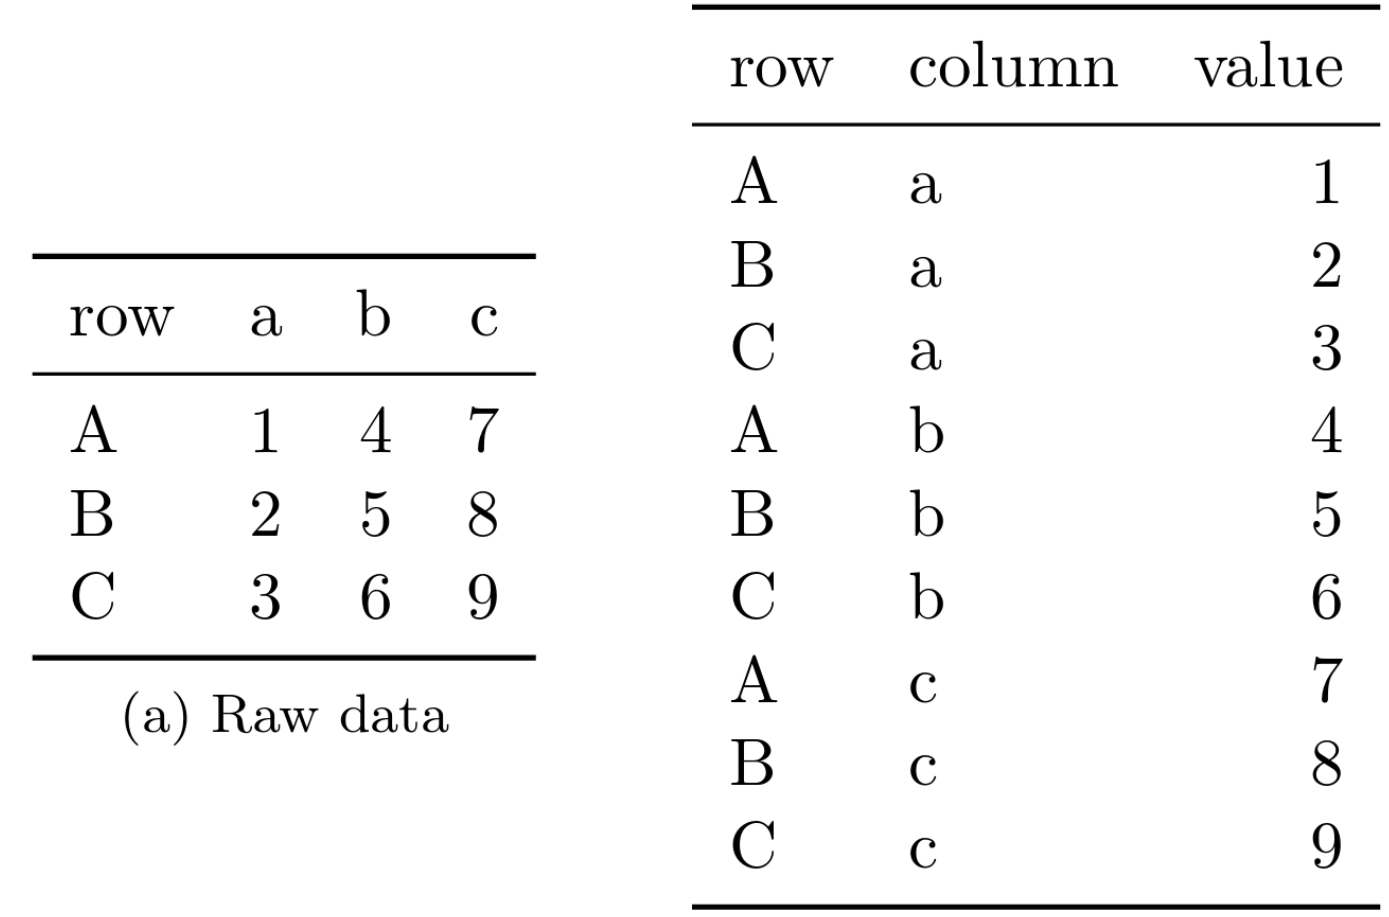

In [184]:
#Example of melting (columns to rows)
print("Melting")
Image("figures/melt.png",width=400)

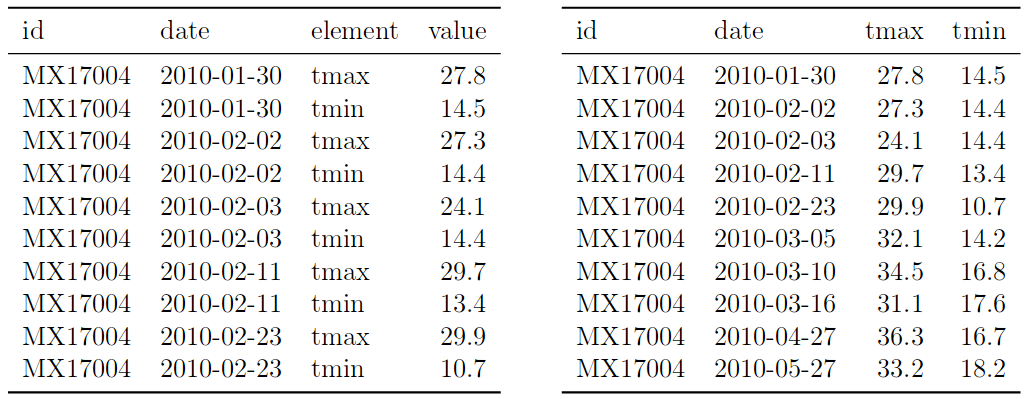

In [186]:
#Example of pivoting (rows to columns)
print("Pivoting")
Image("figures/pivot.png",width=800)

### 2.4 Column headers are values, not variable names: MELT

In [153]:
df = pd.read_csv("data/columns_headers.csv")
df.head()

,Unnamed: 0,METRO_ID,Metropolitan areas,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,0,AT001,Vienna,267.27,269.90,272.56,275.26,277.99,280.75,283.54,286.38,289.24,292.15,295.09,298.07,301.08,304.14,307.23
1,1,AT002,Graz,179.92,181.59,183.28,185.01,186.76,188.55,190.36,192.20,194.07,195.97,197.91,199.87,201.87,203.90,205.96
2,2,AT003,Linz,165.29,165.94,166.60,167.27,167.94,168.62,169.31,170.00,170.70,171.41,172.12,172.84,173.57,174.31,175.05
3,3,AUS,Australia,2.47,2.50,2.53,2.56,2.59,2.62,2.65,2.70,2.76,2.82,2.86,2.90,2.95,3.00,3.05
4,4,AUS01,Sydney,332.15,335.48,338.18,340.38,342.20,344.88,348.04,353.71,360.58,367.35,372.51,376.88,382.38,388.94,395.83


In [154]:
### Fix
variables_already_presents = ['METRO_ID', 'Metropolitan areas']
columns_combine = ['2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013', '2014']
pd.melt(df,id_vars=variables_already_presents,
           value_vars=columns_combine,
           var_name="Year",
           value_name="POP_DENS").head()

,METRO_ID,Metropolitan areas,year,POP_DENS
0,AT001,Vienna,2000,267.27
1,AT002,Graz,2000,179.92
2,AT003,Linz,2000,165.29
3,AUS,Australia,2000,2.47
4,AUS01,Sydney,2000,332.15


### 2.5 Multiple variables are stored in one column: PIVOT

In [48]:
df = pd.read_csv("data/multiple_variables.csv")
df.head()

,Unnamed: 0,METRO_ID,Metropolitan areas,VAR,Variables,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,0,AT001,Vienna,POP_DENS,Population density (persons per km2),2000,2000,RATIO,Ratio,0,Units,NaN,NaN,267.27,NaN,NaN
1,1,AT001,Vienna,POP_DENS,Population density (persons per km2),2001,2001,RATIO,Ratio,0,Units,NaN,NaN,269.90,NaN,NaN
2,2,AT001,Vienna,POP_DENS,Population density (persons per km2),2002,2002,RATIO,Ratio,0,Units,NaN,NaN,272.56,NaN,NaN
3,3,AT001,Vienna,POP_DENS,Population density (persons per km2),2003,2003,RATIO,Ratio,0,Units,NaN,NaN,275.26,NaN,NaN
4,4,AT001,Vienna,POP_DENS,Population density (persons per km2),2004,2004,RATIO,Ratio,0,Units,NaN,NaN,277.99,NaN,NaN


In [49]:
### Fix
column_with_values = "Value"
column_to_split = ["VAR"]
variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
df_fixed = df.pivot_table(column_with_values,
               variables_already_present,
               column_to_split)
df_fixed.head()

VAR                               GREEN_AREA_PC  POP_DENS
METRO_ID Metropolitan areas Year                         
AT001    Vienna             2000         255.17    267.27
                            2001         252.68    269.90
                            2002         250.22    272.56
                            2003         247.77    275.26
                            2004         245.34    277.99

In [50]:
#use .reset_index() to convert index to columns
df_fixed.reset_index().head()

VAR,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,AT001,Vienna,2000,255.17,267.27
1,AT001,Vienna,2001,252.68,269.90
2,AT001,Vienna,2002,250.22,272.56
3,AT001,Vienna,2003,247.77,275.26
4,AT001,Vienna,2004,245.34,277.99


### 2.6 Variables are stored in both rows and columns: MELT then PIVOT

In [179]:
df = pd.read_csv("data/multiple_variables_and_headers.csv")
df.head()

,Unnamed: 0,METRO_ID,Metropolitan areas,VAR,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,0,AT001,Vienna,GREEN_AREA_PC,255.17,252.68,250.22,247.77,245.34,242.92,240.53,238.15,235.79,233.44,231.12,228.81,226.52,224.24,221.99
1,1,AT001,Vienna,POP_DENS,267.27,269.90,272.56,275.26,277.99,280.75,283.54,286.38,289.24,292.15,295.09,298.07,301.08,304.14,307.23
2,2,AT002,Graz,GREEN_AREA_PC,997.39,988.23,979.10,969.96,960.85,951.75,942.72,933.67,924.67,915.69,906.73,897.83,888.95,880.11,871.29
3,3,AT002,Graz,POP_DENS,179.92,181.59,183.28,185.01,186.76,188.55,190.36,192.20,194.07,195.97,197.91,199.87,201.87,203.90,205.96
4,4,AT003,Linz,GREEN_AREA_PC,1791.92,1784.87,1777.80,1770.71,1763.59,1756.49,1749.38,1742.23,1735.10,1727.91,1720.77,1713.59,1706.40,1699.20,1691.99


In [168]:
### Fix setp 1
variables_already_presents = ['METRO_ID', 'Metropolitan areas','VAR']
columns_combine = ['2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013', '2014']
df = pd.melt(df,id_vars=variables_already_presents,
           value_vars=columns_combine,
           var_name="Year",
           value_name="Value")
df.head()

,METRO_ID,Metropolitan areas,VAR,Year,Value
0,AT001,Vienna,GREEN_AREA_PC,2000,255.17
1,AT001,Vienna,POP_DENS,2000,267.27
2,AT002,Graz,GREEN_AREA_PC,2000,997.39
3,AT002,Graz,POP_DENS,2000,179.92
4,AT003,Linz,GREEN_AREA_PC,2000,1791.92


In [170]:
### Fix step 2
column_with_values = "Value"
column_to_split = ["VAR"]
variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
df.pivot_table(column_with_values,
               variables_already_present,
               column_to_split).reset_index().head()

VAR,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,AT001,Vienna,2000,255.17,267.27
1,AT001,Vienna,2001,252.68,269.90
2,AT001,Vienna,2002,250.22,272.56
3,AT001,Vienna,2003,247.77,275.26
4,AT001,Vienna,2004,245.34,277.99


## 3. Merging and concatenating datasets
Concatenate:
- Some times you obtain more data (with the same variables

Merging:
- Many times you have several datasets that you have to combine according to a shared variable

### 2.7 Concatenate files (add more observations)

In [23]:
#Add more observations
Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png")

In [30]:
madrid = pd.read_csv("data/mad_twovariables.csv").head(2)
amsterdam = pd.read_csv("data/ams_twovariables.csv").head(2)
print(madrid)
print(amsterdam)



  METRO_ID Metropolitan areas  Year  GREEN_AREA_PC  POP_DENS
0    ES001             Madrid  2000           31.5    471.88
1    ES001             Madrid  2001           31.0    479.60
  METRO_ID Metropolitan areas  Year  GREEN_AREA_PC  POP_DENS
0    NL002          Amsterdam  2000         235.63    764.71
1    NL002          Amsterdam  2001         233.57    771.45


In [31]:
combined = pd.concat([madrid,amsterdam])
combined

,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,ES001,Madrid,2000,31.50,471.88
1,ES001,Madrid,2001,31.00,479.60
0,NL002,Amsterdam,2000,235.63,764.71
1,NL002,Amsterdam,2001,233.57,771.45


**it's not a problem if the variables are not all the same**

But in that case there appear missing values

In [10]:
a = pd.DataFrame([[1,2],[3,4]],columns=["a","b"])
b = pd.DataFrame([[1,2],[3,4]],columns=["c","b"])
display(a)
display(b)
pd.concat([a,b])

,a,b
0,1,2
1,3,4


,c,b
0,1,2
1,3,4


,a,b,c
0,1.0,2,NaN
1,3.0,4,NaN
0,NaN,2,1.0
1,NaN,4,3.0


### MERGE DATASETS 

In [192]:
Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key.png",width=700)

In [33]:
ams_green = pd.read_csv("data/ams_green.csv")
ams_pop = pd.read_csv("data/ams_popdens.csv")
print(ams_green.head(2))
print(ams_pop.head(2))

  METRO_ID Metropolitan areas  Year  GREEN_AREA_PC
0    NL002          Amsterdam  2000         235.63
1    NL002          Amsterdam  2001         233.57
  METRO_ID Metropolitan areas  Year  POP_DENS
0    NL002          Amsterdam  2000    764.71
1    NL002          Amsterdam  2001    771.45


In [36]:
combined = pd.merge(ams_green,ams_pop,
         left_on=["METRO_ID","Metropolitan areas","Year"],
         right_on=["METRO_ID","Metropolitan areas","Year"],
         how="inner")
combined.head()

,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,NL002,Amsterdam,2000,235.63,764.71
1,NL002,Amsterdam,2001,233.57,771.45
2,NL002,Amsterdam,2002,231.51,778.30
3,NL002,Amsterdam,2003,229.46,785.26
4,NL002,Amsterdam,2004,227.41,792.34


In [201]:
print("Inner join pd.merge(left_df,right_df,how=\"inner\")")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_inner.png"))
print("Right join pd.merge(left_df,right_df,how=\"right\")", "The same with left")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_right.png"))
print("Outer join pd.merge(left_df,right_df,how=\"outer\")")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_outer.png"))

Inner join pd.merge(left_df,right_df,how="inner")


Right join pd.merge(left_df,right_df,how="right") The same with left


Outer join pd.merge(left_df,right_df,how="outer")


In [ ]:
dealing with missing
.dropna
.replace
x[np.isfinite(x)]

In [ ]:
replace and apply methods

## 5. Plotting
- Histogram and jointplot
- Barplot
- Parallel coordinates

In [55]:
#Read and fix the data
df = pd.read_csv("data/CITIES_19122016195113034.csv",sep="\t")

cols = list(df.columns)
cols[0] = "METRO_ID"
df.columns = cols
df.head()

column_with_values = "Value"
column_to_split = ["VAR"]
variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
df_fixed = df.pivot_table(column_with_values,
             variables_already_present,
             column_to_split)
df_fixed = df_fixed.reset_index()
#df_fixed = df_fixed.loc[df_fixed["Year"]==2008]
df_fixed = df_fixed.dropna(subset=["LABOUR_PRODUCTIVITY","UNEMP_R"])
df_fixed.head()

VAR,METRO_ID,Metropolitan areas,Year,CO2_PC,ENTROPY_1000M,EQU_HOU_DISP_INC,GDP_PC,GINI_INC,GREEN_AREA_PC,LABOUR_PRODUCTIVITY,PCT_INTENSITY,POP_DENS,SPRAWL,UNEMP_R
0,AT001,Vienna,2000,12.77,NaN,NaN,45434.48,NaN,255.17,94254.60,0.90,267.27,NaN,4.77
1,AT001,Vienna,2001,NaN,NaN,NaN,45479.15,NaN,252.68,94805.82,0.97,269.90,NaN,4.83
2,AT001,Vienna,2002,NaN,NaN,NaN,46065.50,NaN,250.22,100463.10,1.06,272.56,NaN,5.82
3,AT001,Vienna,2003,NaN,NaN,NaN,45470.92,NaN,247.77,97851.61,1.15,275.26,NaN,6.24
4,AT001,Vienna,2004,NaN,NaN,NaN,46148.38,NaN,245.34,102259.13,1.34,277.99,NaN,7.20


In [15]:
x = df_fixed["LABOUR_PRODUCTIVITY"]
y = df_fixed["UNEMP_R"]

/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


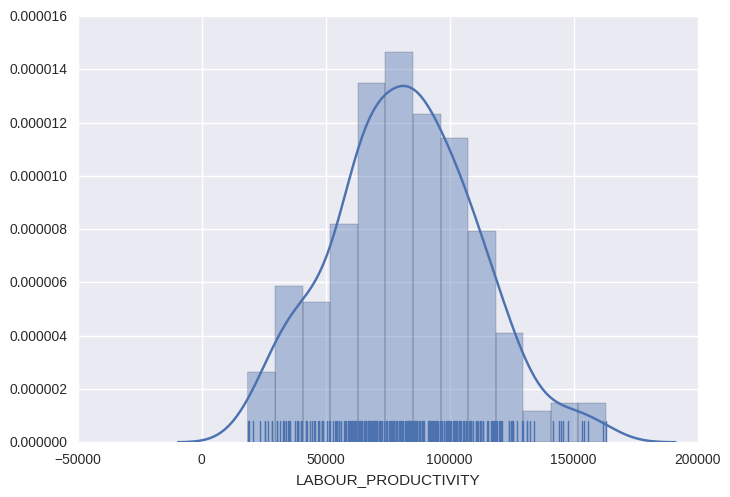

In [18]:
sns.distplot(x, kde=True, rug=True)

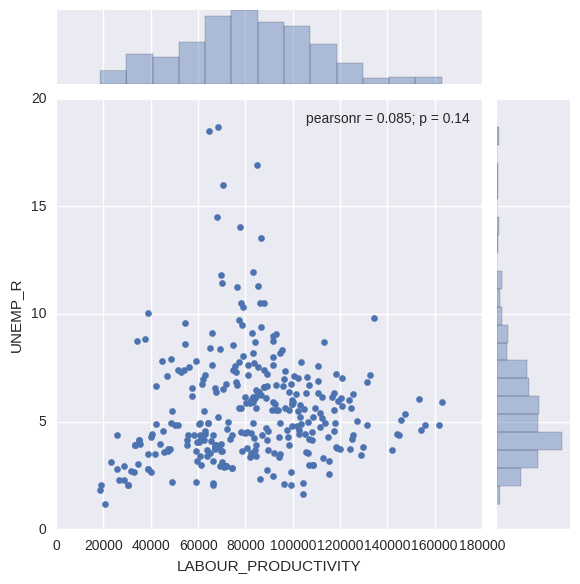

In [19]:
sns.jointplot(x="LABOUR_PRODUCTIVITY", y="UNEMP_R", data=df_fixed);

In [36]:
sns.jointplot?
https://i.stack.imgur.com/t5U6q.png

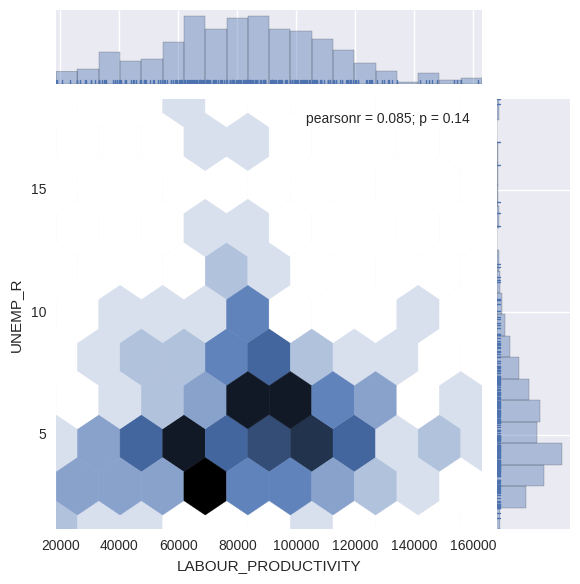

In [42]:
sns.jointplot(x="LABOUR_PRODUCTIVITY", y="UNEMP_R", data=df_fixed,kind="hex",
              marginal_kws=dict(bins=20, rug=True),
             joint_kws=dict(bins=10), gridsize = 10)

In [ ]:
from pandas.tools.plotting import parallel_coordinates

In [84]:
df_fixed["C"] = df_fixed["METRO_ID"].apply(lambda x: x[:2] if isinstance(x,str) else "")
italy = df_fixed.loc[df_fixed["C"].isin(["IT"])]
#italy = italy.loc[italy["Year"].isin([2001,2006,2011])]
italy.head()

VAR,METRO_ID,Metropolitan areas,Year,CO2_PC,ENTROPY_1000M,EQU_HOU_DISP_INC,GDP_PC,GINI_INC,GREEN_AREA_PC,LABOUR_PRODUCTIVITY,PCT_INTENSITY,POP_DENS,SPRAWL,UNEMP_R,C
1530,IT001,Rome,2000,10.36,NaN,NaN,47836.13,NaN,251.93,122766.44,0.33,651.06,NaN,11.05,IT
1531,IT001,Rome,2001,NaN,NaN,NaN,48928.59,NaN,250.04,124464.71,0.38,655.97,NaN,9.98,IT
1532,IT001,Rome,2002,NaN,NaN,NaN,49323.37,NaN,248.15,122641.81,0.36,660.98,NaN,7.93,IT
1533,IT001,Rome,2003,NaN,NaN,NaN,48662.53,NaN,246.25,120883.80,0.46,666.08,NaN,8.03,IT
1534,IT001,Rome,2004,NaN,NaN,NaN,50172.53,NaN,244.34,122254.22,0.50,671.29,NaN,7.47,IT


/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


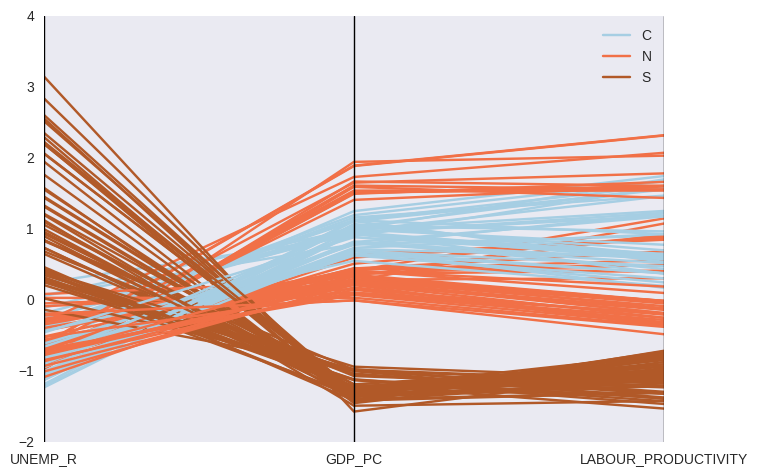

In [90]:
d_city2regio = {"Bari": "S",
"Bologna": "C",
"Catania": "S",
"Florence": "C",
"Genova": "N",
"Milan": "N",
"Naples": "S",
"Palermo": "S",
"Rome": "C",
"Turin": "N",
"Venice": "N"}
italy["Area"] = italy["Metropolitan areas"].apply(lambda x: d_city2regio.get(x))

cols = ["UNEMP_R",'GDP_PC',"LABOUR_PRODUCTIVITY"]


parallel_coordinates(italy.loc[(italy["Metropolitan areas"] !="Italy")],"Area",cols=cols,colormap="Paired")

In [ ]:
**normalize**

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


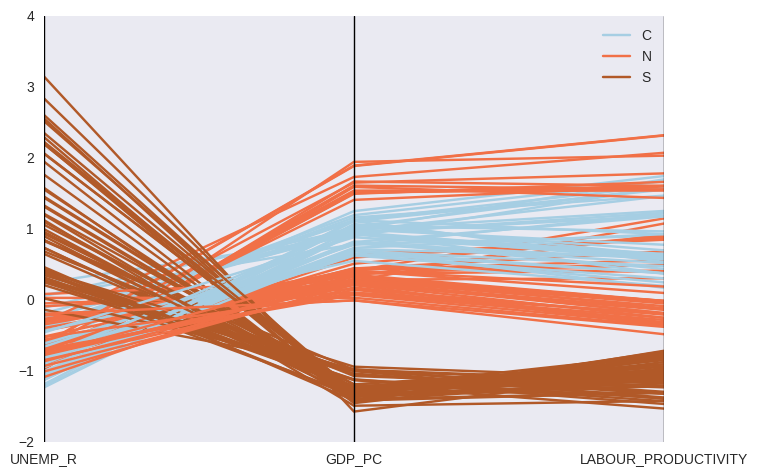

In [91]:
for c in cols: italy[c] = (italy[c]- np.mean(italy[c]))/np.std(italy[c]) 
parallel_coordinates(italy.loc[(italy["Metropolitan areas"] !="Italy")],"Area",cols=cols,colormap="Paired")

In [117]:
df_fixed["C"] = df_fixed["METRO_ID"].apply(lambda x: x[:2] if isinstance(x,str) else "")
south = df_fixed.loc[df_fixed["C"].isin(["IT","ES","PT","FR","GR","DE"])]
italy.head()

VAR,METRO_ID,Metropolitan areas,Year,CO2_PC,ENTROPY_1000M,EQU_HOU_DISP_INC,GDP_PC,GINI_INC,GREEN_AREA_PC,LABOUR_PRODUCTIVITY,PCT_INTENSITY,POP_DENS,SPRAWL,UNEMP_R,C,Area
1530,IT001,Rome,2000,10.36,NaN,NaN,0.900792,NaN,0.636894,1.589411,0.33,-0.388468,NaN,0.243025,IT,C
1531,IT001,Rome,2001,NaN,NaN,NaN,0.999411,NaN,0.625186,1.700693,0.38,-0.379543,NaN,0.065738,IT,C
1532,IT001,Rome,2002,NaN,NaN,NaN,1.035049,NaN,0.613477,1.581244,0.36,-0.370437,NaN,-0.273926,IT,C
1533,IT001,Rome,2003,NaN,NaN,NaN,0.975393,NaN,0.601707,1.466047,0.46,-0.361166,NaN,-0.257357,IT,C
1534,IT001,Rome,2004,NaN,NaN,NaN,1.111705,NaN,0.589875,1.555846,0.50,-0.351696,NaN,-0.350143,IT,C


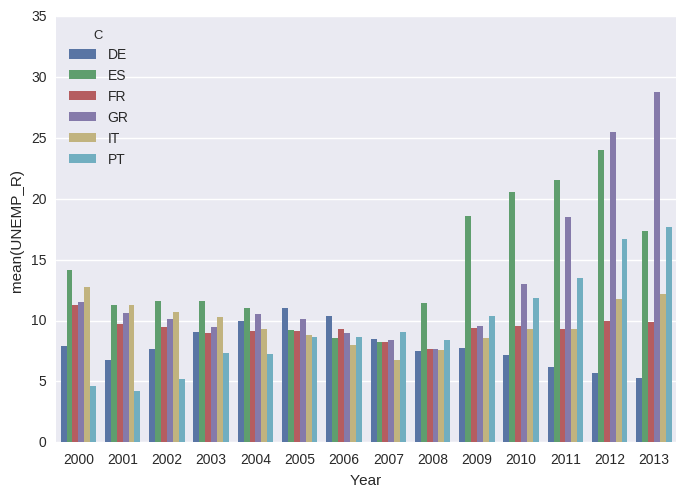

In [118]:
sns.barplot(x="Year",y="UNEMP_R",hue="C",data=south,edgecolor="none",errcolor="none")#,palette="Set3")
#More: http://seaborn.pydata.org/generated/seaborn.factorplot.html

In [97]:
plt.bar?

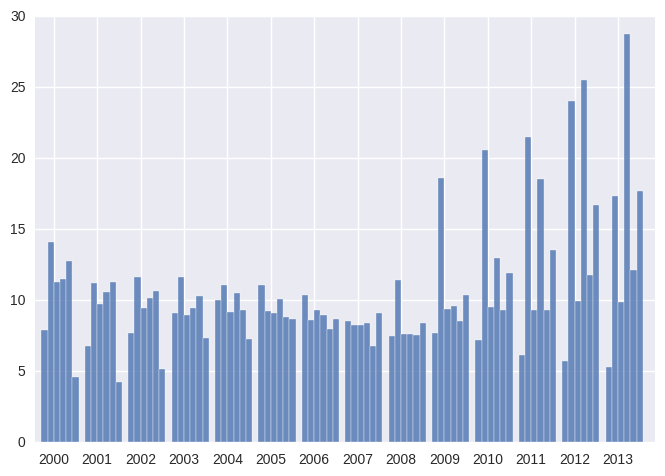

In [159]:
n_countries = 6
i = 0
for year, frame in south.groupby("Year"):
    j = 0
    i += 1
    for country,subframe in frame.groupby("C"):
        
        j += 1
        
        mean_unemp = np.mean(subframe["UNEMP_R"])
        
    
        plt.bar(i*(n_countries+1)+j-2,height = mean_unemp,width=1,edgecolor="white",alpha=0.8)
    

plt.xticks(range(8,7*(i+1),7),range(2000,2000+i))
plt.xlim(5,7*(i+1))
plt.show()

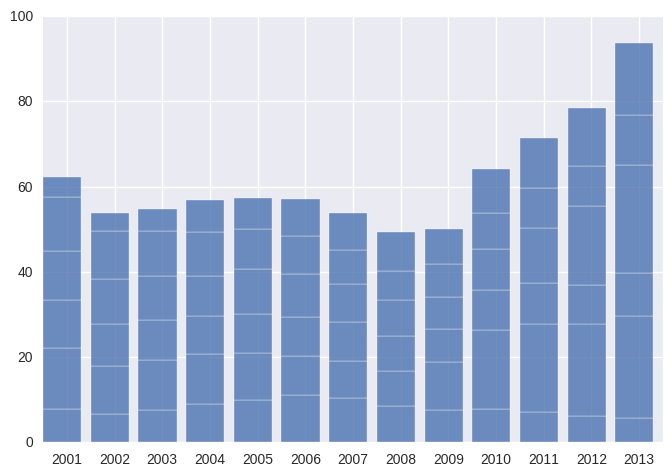

In [168]:
n_countries = 6
i = 0
for year, frame in south.groupby("Year"):    
    i += 1
    acc = 0
    for country,subframe in frame.groupby("C"):
        mean_unemp = np.mean(subframe["UNEMP_R"])        
    
        plt.bar(i,height = mean_unemp,bottom=acc,width=0.8,edgecolor="white",alpha=0.8)
        acc += mean_unemp

plt.xticks(0.5+np.arange(i),range(2000,2000+i))
plt.xlim(1,i)
plt.show()